# HR Attrition

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

In [2]:
df1=pd.read_csv('dataset.csv')

In [3]:
df1.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df1.shape

(1470, 35)

In [5]:
for col in df1.columns:
    print(f'{col}: {df1[col].dtype}')


Age: int64
Attrition: object
BusinessTravel: object
DailyRate: int64
Department: object
DistanceFromHome: int64
Education: int64
EducationField: object
EmployeeCount: int64
EmployeeNumber: int64
EnvironmentSatisfaction: int64
Gender: object
HourlyRate: int64
JobInvolvement: int64
JobLevel: int64
JobRole: object
JobSatisfaction: int64
MaritalStatus: object
MonthlyIncome: int64
MonthlyRate: int64
NumCompaniesWorked: int64
Over18: object
OverTime: object
PercentSalaryHike: int64
PerformanceRating: int64
RelationshipSatisfaction: int64
StandardHours: int64
StockOptionLevel: int64
TotalWorkingYears: int64
TrainingTimesLastYear: int64
WorkLifeBalance: int64
YearsAtCompany: int64
YearsInCurrentRole: int64
YearsSinceLastPromotion: int64
YearsWithCurrManager: int64


### Removing Redundant Columns

There are columns in this dataset which are not required for are analysis such as 'Over18' this column indicates if the employee is above 18 years in age or 'EmployeeCount' i.e. number of employees with that specific attributes which is always 1 in this case. 

In [6]:
df=df1.drop(['EmployeeCount','Over18','StandardHours'],axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [7]:
df.shape

(1470, 32)

### Removing Null Values

In [8]:
for col in df.columns:
    print(f'{col}: {df[col].isna().sum()}')

Age: 0
Attrition: 0
BusinessTravel: 0
DailyRate: 0
Department: 0
DistanceFromHome: 0
Education: 0
EducationField: 0
EmployeeNumber: 0
EnvironmentSatisfaction: 0
Gender: 0
HourlyRate: 0
JobInvolvement: 0
JobLevel: 0
JobRole: 0
JobSatisfaction: 0
MaritalStatus: 0
MonthlyIncome: 0
MonthlyRate: 0
NumCompaniesWorked: 0
OverTime: 0
PercentSalaryHike: 0
PerformanceRating: 0
RelationshipSatisfaction: 0
StockOptionLevel: 0
TotalWorkingYears: 0
TrainingTimesLastYear: 0
WorkLifeBalance: 0
YearsAtCompany: 0
YearsInCurrentRole: 0
YearsSinceLastPromotion: 0
YearsWithCurrManager: 0


The dataset is relatively clean as it has no null values

### Removing Duplicates

In [9]:
print(f'Duplicates in employee number: {df['EmployeeNumber'].duplicated().sum()}')

Duplicates in employee number: 0


This means this dataset has no duplicates

## EDA

In [10]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1024.865306,2.721769,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,602.024335,1.093082,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,491.250000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1020.500000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1555.750000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

### Handling Outliers for wages

In [12]:
def outliers(col):
    med=df[col].median()
    fq=df[col].quantile(0.25)
    tq=df[col].quantile(0.75)
    iqr=tq-fq
    lower_bound = med - (1.5 * iqr)
    upper_bound = med + (1.5 * iqr)

    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(outlier_count)

0
0
0
183


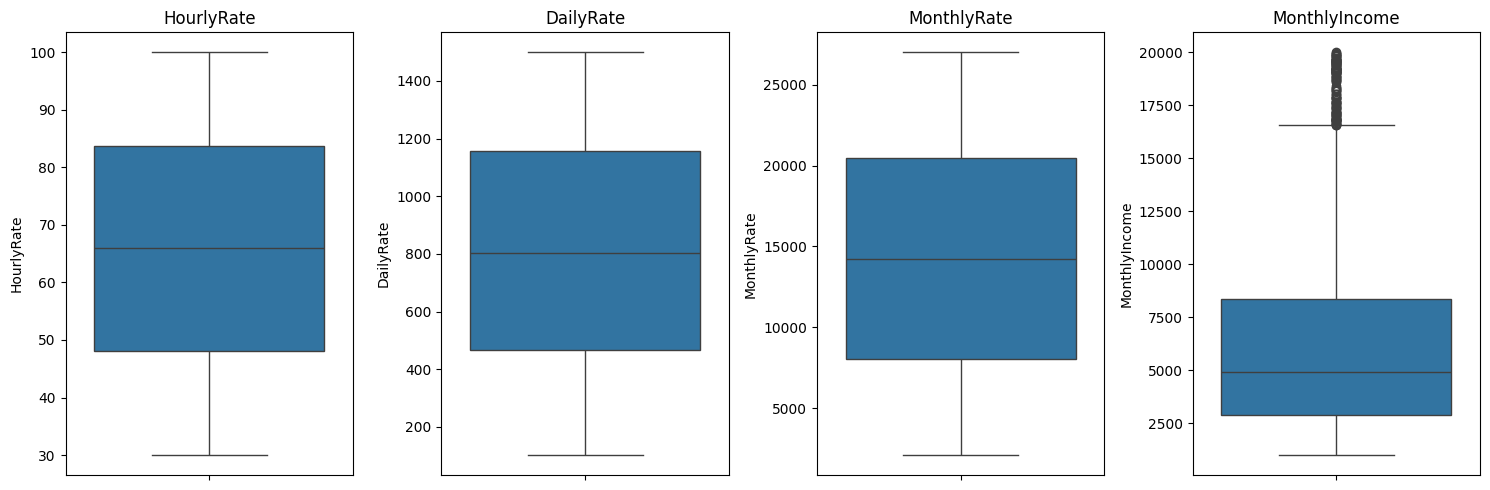

In [13]:
columns=['HourlyRate','DailyRate','MonthlyRate','MonthlyIncome']
for col in columns:
    outliers(col)
## Plotting box plots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Monthly Income has outliers. Handling them by taking log.
Not direclty removing since the dataset is small and this accounts for approx 12% of the dataset.

Thus we could miss complete story from the data

In [14]:
df['MonthlyIncome_log'] = np.log1p(df['MonthlyIncome'])

0
None


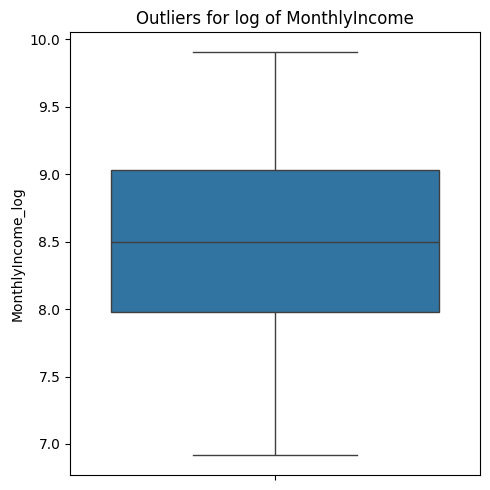

In [15]:
print(outliers('MonthlyIncome_log'))
plt.figure(figsize=(5,5))
sns.boxplot(df['MonthlyIncome_log'])
plt.title('Outliers for log of MonthlyIncome')
plt.tight_layout()
plt.show()

Now we have no outliers

### Distribution of Employees

In [16]:
dfa=df[df['Attrition']=='Yes']

In [17]:
ndfa=df[df['Attrition']=='No']

In [19]:
dfa

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome_log
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,0,8,0,1,6,4,0,5,8.698514
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,0,7,3,3,0,0,0,0,7.645398
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,19,3,...,2,0,6,4,3,4,2,0,3,7.615298
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,27,3,...,2,0,10,4,3,5,3,0,3,8.133881
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,31,2,...,3,0,8,2,3,4,2,1,3,7.993282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,2023,4,...,1,1,1,3,2,1,0,1,0,7.490529
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,2027,1,...,2,3,4,3,4,2,2,2,2,8.473868
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,2032,4,...,4,1,14,4,1,10,9,9,8,7.757906
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,2044,2,...,4,2,12,3,3,6,3,0,1,8.814182


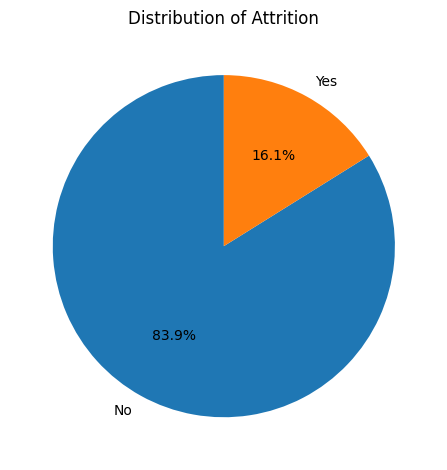

In [20]:
plt.pie(x=df['Attrition'].value_counts().values,labels=df['Attrition'].value_counts().index,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Attrition')
plt.tight_layout()
plt.show()

#### Department

In [21]:
attrition_counts = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)

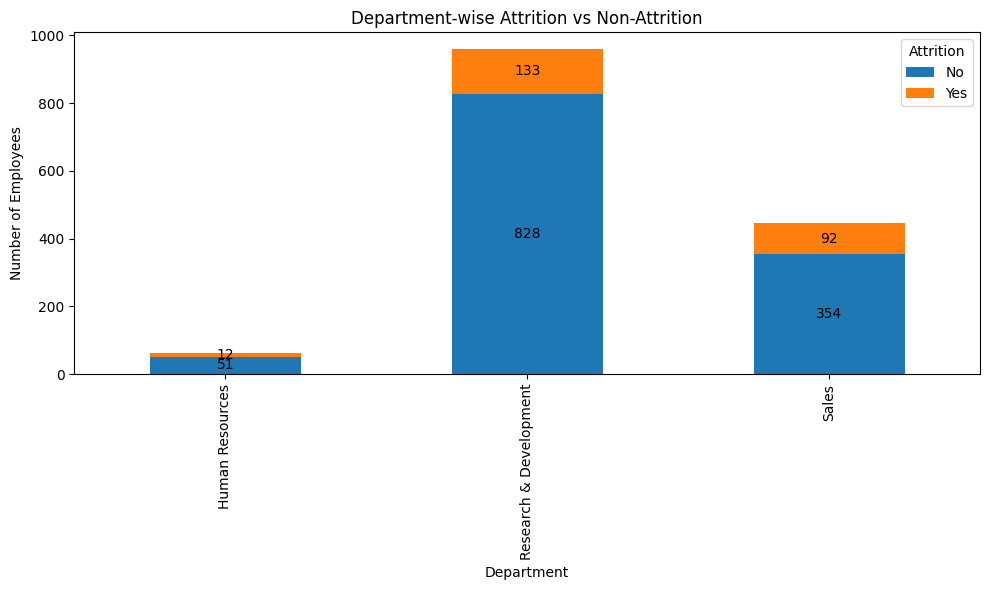

In [27]:
ax=attrition_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Department-wise Attrition vs Non-Attrition')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
for i, department in enumerate(attrition_counts.index):
    bottom = 0
    for attrition_type in attrition_counts.columns:
        value = attrition_counts.loc[department, attrition_type]
        if value > 0:
            ax.text(i, bottom + value / 2, str(value), ha='center', va='center', fontsize=10)
            bottom += value
plt.tight_layout()
plt.show()

This shows that sales department sees relatively more attrition ratio wise

#### Age

In [31]:
yesa=dfa['Age']
noa=ndfa['Age']

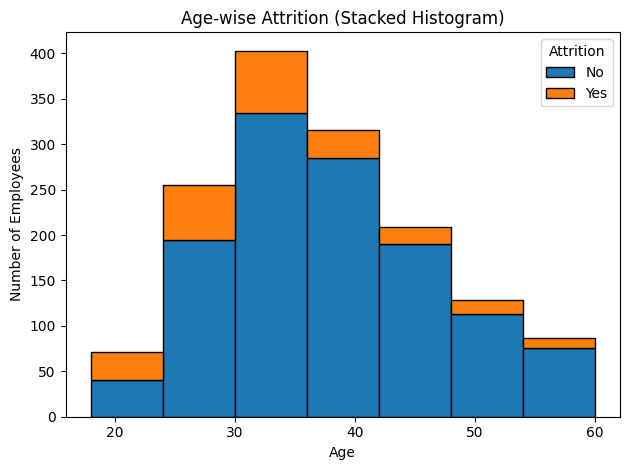

In [ ]:
plt.hist([noa, yesa],
         bins=range(18, 61, 6),  
         stacked=True,
         label=['No', 'Yes'],
         edgecolor='black')

plt.title('Age-wise Attrition (Stacked Histogram)')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

This shows that freshers i.e. the youngest age grp is most likely to switch and older the employee gets, the chances of attrition reduces.

#### Job Role

In [ ]:
sales=df[df['Department']=='Sales']
hr=df[df['Department']=='Human Resources']
rd=df[df['Department']=='Research & Development']

In [ ]:
sales_attr = (
    sales.groupby(['JobRole', 'Attrition'])
    .size()
    .reset_index(name='Count')
    .pivot(index='JobRole', columns='Attrition', values='Count')
    .fillna(0)
)
hr_attr = (
    hr.groupby(['JobRole', 'Attrition'])
    .size()
    .reset_index(name='Count')
    .pivot(index='JobRole', columns='Attrition', values='Count')
    .fillna(0)
)

rd_attr = (
    rd.groupby(['JobRole', 'Attrition'])
    .size()
    .reset_index(name='Count')
    .pivot(index='JobRole', columns='Attrition', values='Count')
    .fillna(0)
)

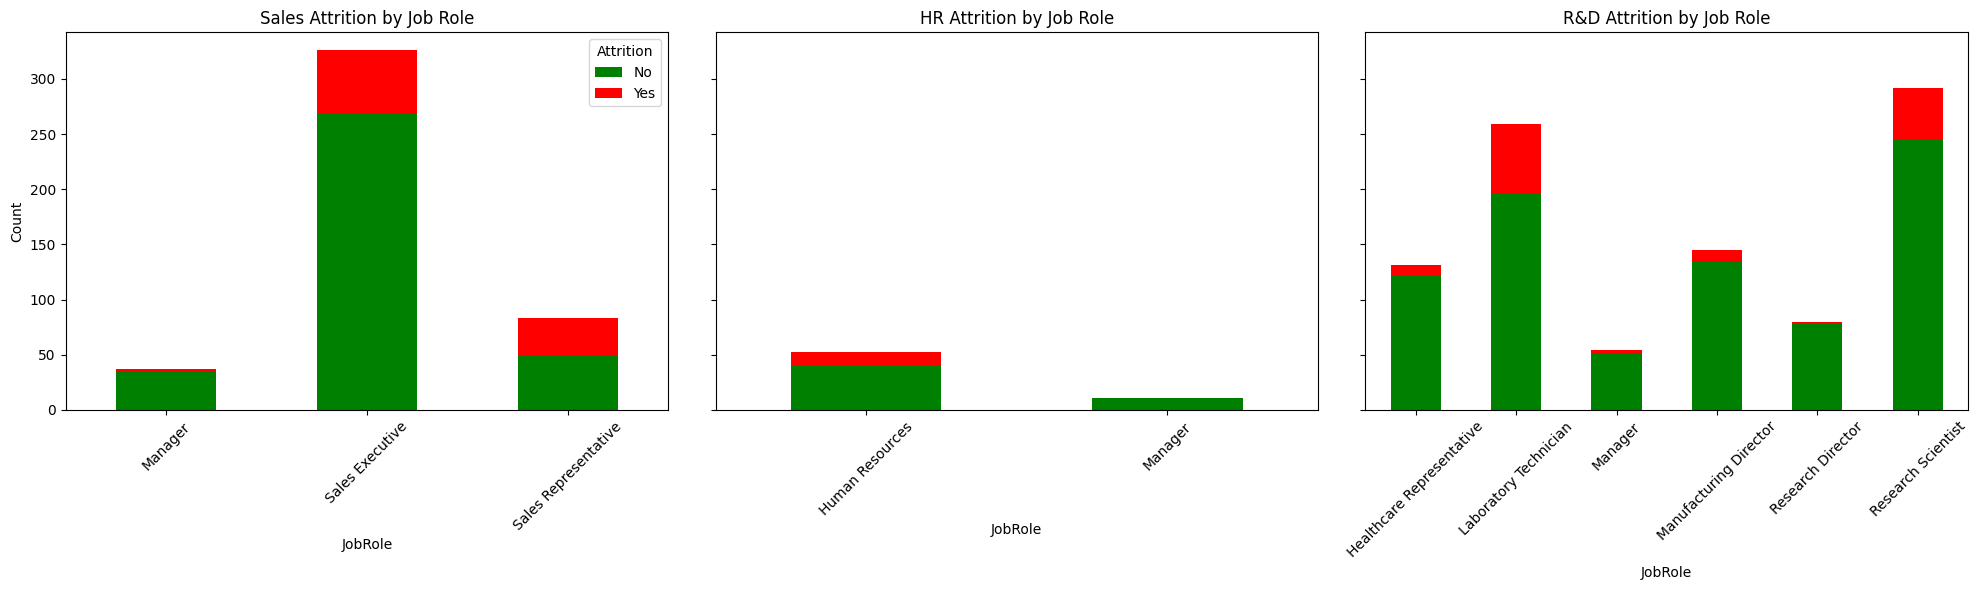

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
sales_attr.plot(kind='bar', stacked=True, ax=axes[0], color=['green', 'red'])
axes[0].set_title('Sales Attrition by Job Role')
axes[0].set_ylabel('Count')
axes[0].legend(title='Attrition')
axes[0].tick_params(axis='x', rotation=45)

# HR
hr_attr.plot(kind='bar', stacked=True, ax=axes[1], color=['green', 'red'])
axes[1].set_title('HR Attrition by Job Role')
axes[1].legend().set_visible(False)
axes[1].tick_params(axis='x', rotation=45)

# R&D
rd_attr.plot(kind='bar', stacked=True, ax=axes[2], color=['green', 'red'])
axes[2].set_title('R&D Attrition by Job Role')
axes[2].legend().set_visible(False)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

This indicates that in :
1. Sales: Sales Representative is highly likely to be a part of attrition
2. HR: Human Resources is likely to be part of attrition
3. R&D: Laboratory Technician is most likely to be a part of attrition

Also key observation here is that seniority in position reduces likliness of being part of attrition 

#### Gender

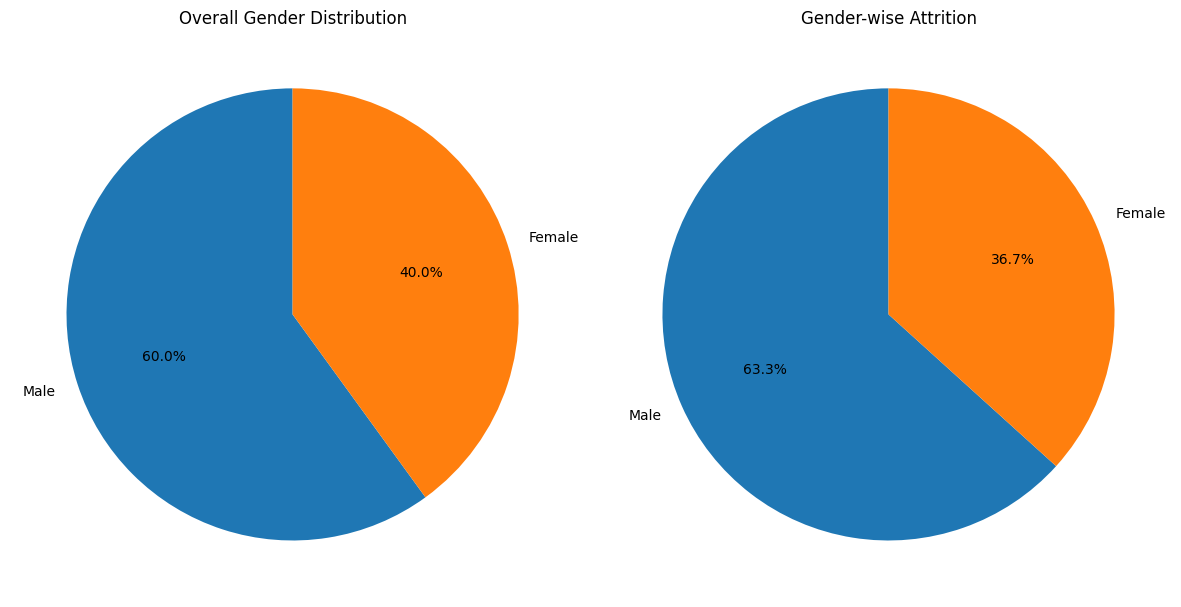

In [69]:
fig,axes=plt.subplots(1,2,figsize=(12,6))

df['Gender'].value_counts().plot.pie(
    autopct='%1.1f%%',
    ax=axes[0],
    startangle=90
)
axes[0].set_title('Overall Gender Distribution')
axes[0].set_ylabel('')  

attrition_yes = df[df['Attrition'] == 'Yes']

attrition_yes['Gender'].value_counts().plot.pie(
    autopct='%1.1f%%',
    ax=axes[1],
    startangle=90
)
axes[1].set_title('Gender-wise Attrition')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

This shows men are more likely to be a part of attrition

#### Marital Status

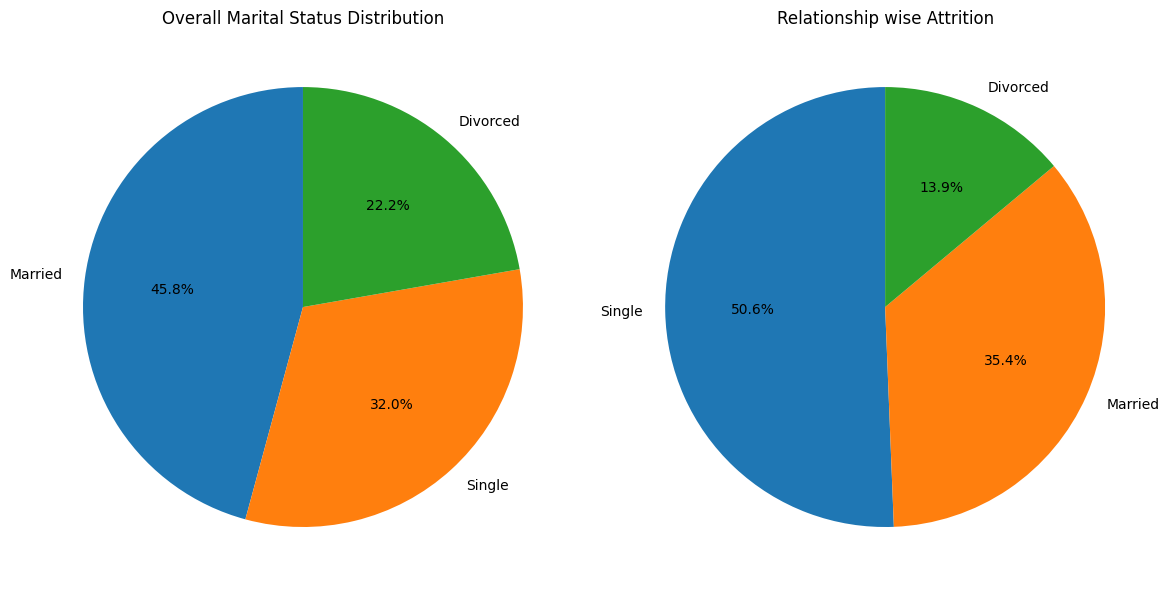

In [70]:
fig,axes=plt.subplots(1,2,figsize=(12,6))

df['MaritalStatus'].value_counts().plot.pie(
    autopct='%1.1f%%',
    ax=axes[0],
    startangle=90
)
axes[0].set_title('Overall Marital Status Distribution')
axes[0].set_ylabel('')  

attrition_yes = df[df['Attrition'] == 'Yes']

attrition_yes['MaritalStatus'].value_counts().plot.pie(
    autopct='%1.1f%%',
    ax=axes[1],
    startangle=90
)
axes[1].set_title('Relationship wise Attrition')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

Single people are more likely to leave.

Taking in account gender in relation wise attrition.

In [74]:
gender_attr = (
    df.groupby(['MaritalStatus','Gender', 'Attrition'])
    .size()
    .reset_index(name='Count')
    .pivot(index=['MaritalStatus', 'Gender'], columns='Attrition', values='Count')
    .fillna(0)
)

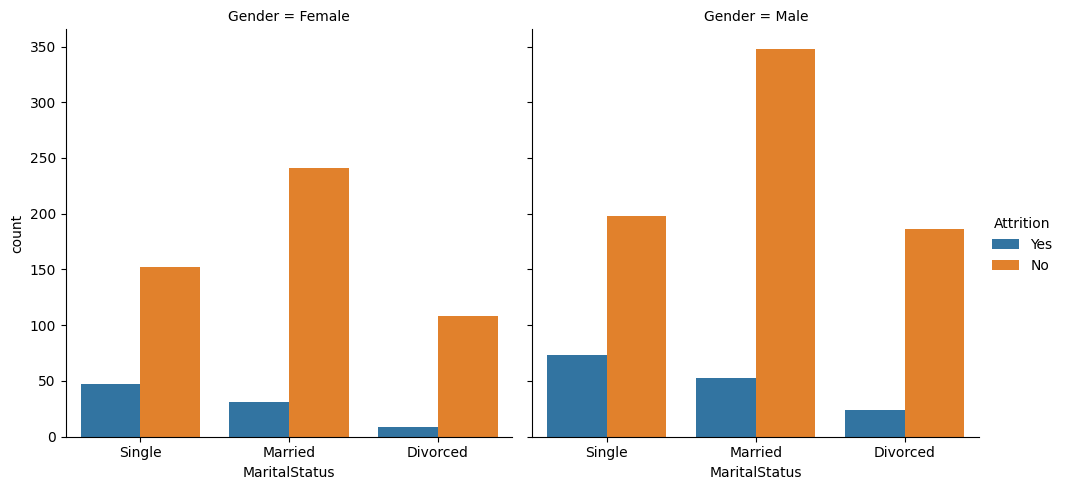

In [80]:
g = sns.catplot(
    data=df,
    kind='count',
    x='MaritalStatus',
    hue='Attrition',
    col='Gender',
    height=5,
    aspect=1
)


This shows that single people are more likely to be part of attrition 

#### Relationship Satisfaction

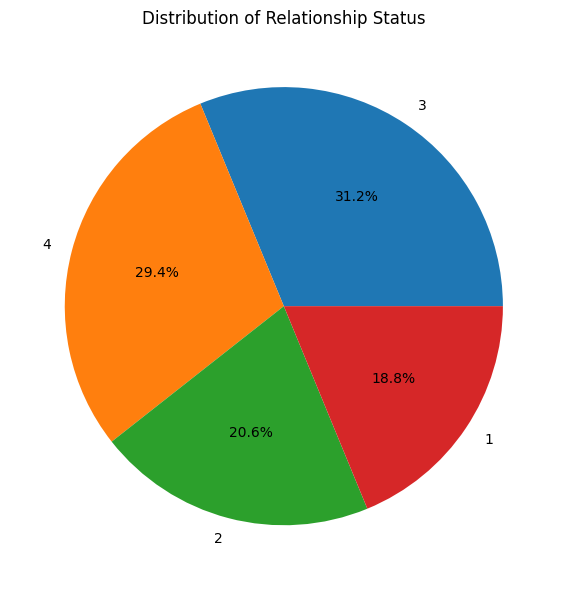

In [86]:
rs=df['RelationshipSatisfaction'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(rs,labels=rs.index,autopct='%1.1f%%')
plt.title('Distribution of Relationship Status')
plt.tight_layout()
plt.show()

In [92]:
rsa = (
    df.groupby(['RelationshipSatisfaction', 'Attrition'])
    .size()
    .reset_index(name='Count')
)

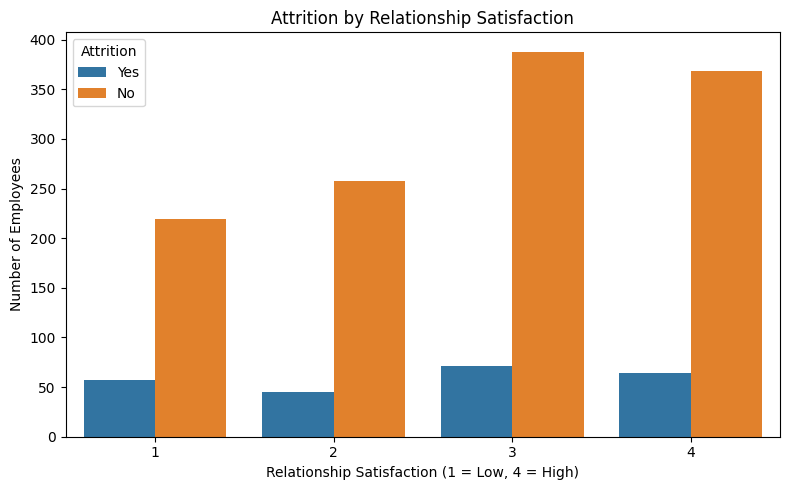

In [94]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RelationshipSatisfaction', hue='Attrition')

plt.title('Attrition by Relationship Satisfaction')
plt.xlabel('Relationship Satisfaction (1 = Low, 4 = High)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

#### Education Field

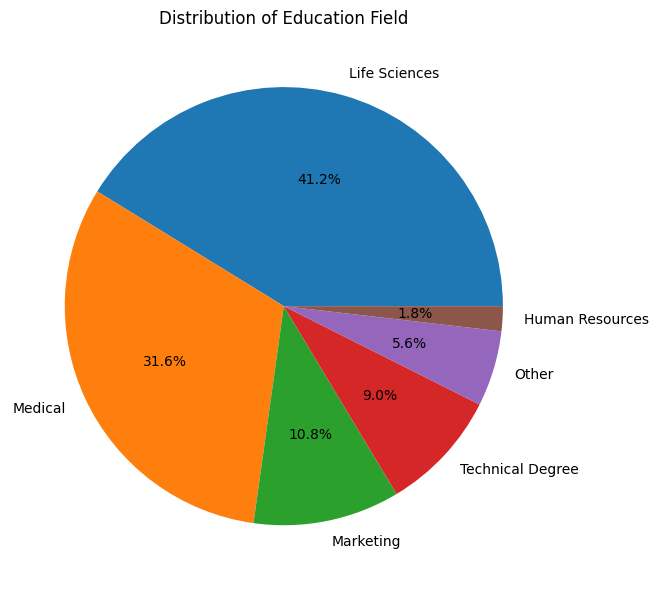

In [98]:
rs=df['EducationField'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(rs,labels=rs.index,autopct='%1.1f%%')
plt.title('Distribution of Education Field')
plt.tight_layout()
plt.show()

#### Number of Companies

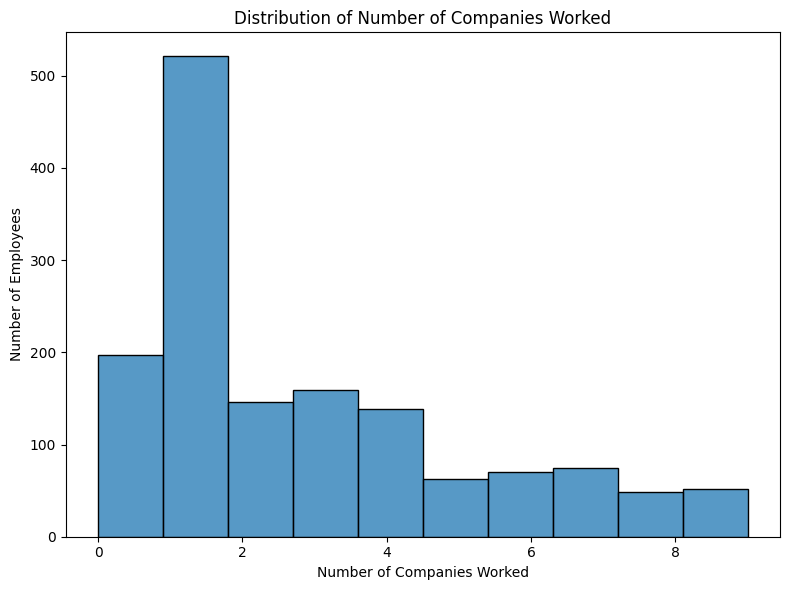

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='NumCompaniesWorked', bins=len(df['NumCompaniesWorked'].unique()), kde=False)

plt.title('Distribution of Number of Companies Worked')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

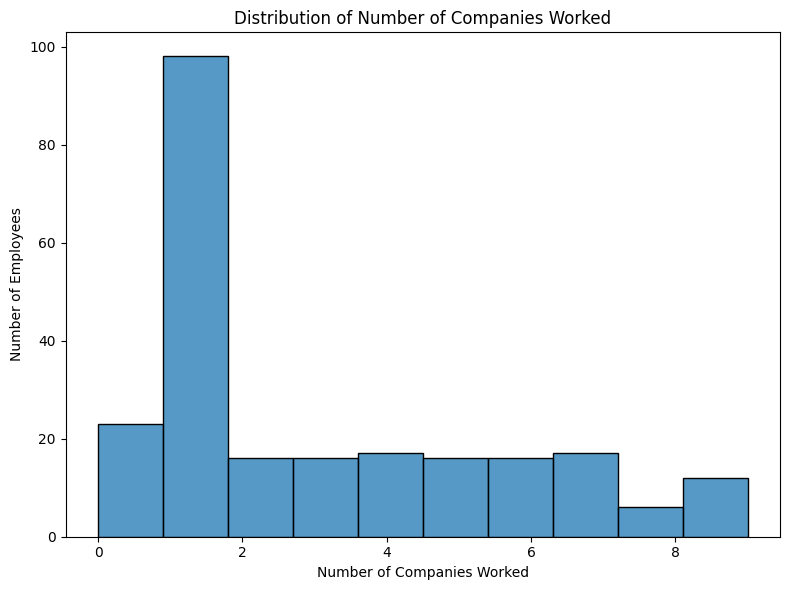

In [104]:
plt.figure(figsize=(8,6))
sns.histplot(data=dfa, x='NumCompaniesWorked', bins=len(df['NumCompaniesWorked'].unique()), kde=False)

plt.title('Distribution of Number of Companies Worked')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

#### Hourly Wages

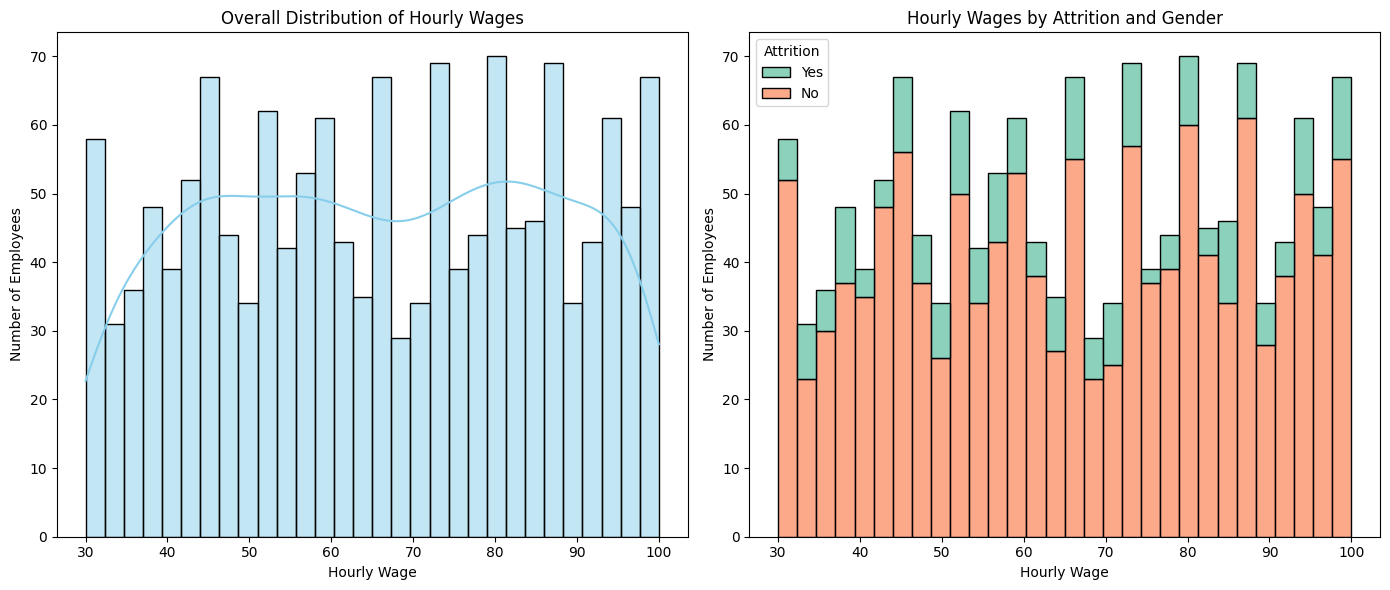

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['HourlyRate'], kde=True, bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Overall Distribution of Hourly Wages')
axes[0].set_xlabel('Hourly Wage')
axes[0].set_ylabel('Number of Employees')

sns.histplot(
    data=df,
    x='HourlyRate',
    hue='Attrition',
    multiple='stack',
    bins=30,
    ax=axes[1],
    palette='Set2'
)
axes[1].set_title('Hourly Wages by Attrition and Gender')
axes[1].set_xlabel('Hourly Wage')
axes[1].set_ylabel('Number of Employees')

plt.tight_layout()
plt.show()

#### Daily Wages

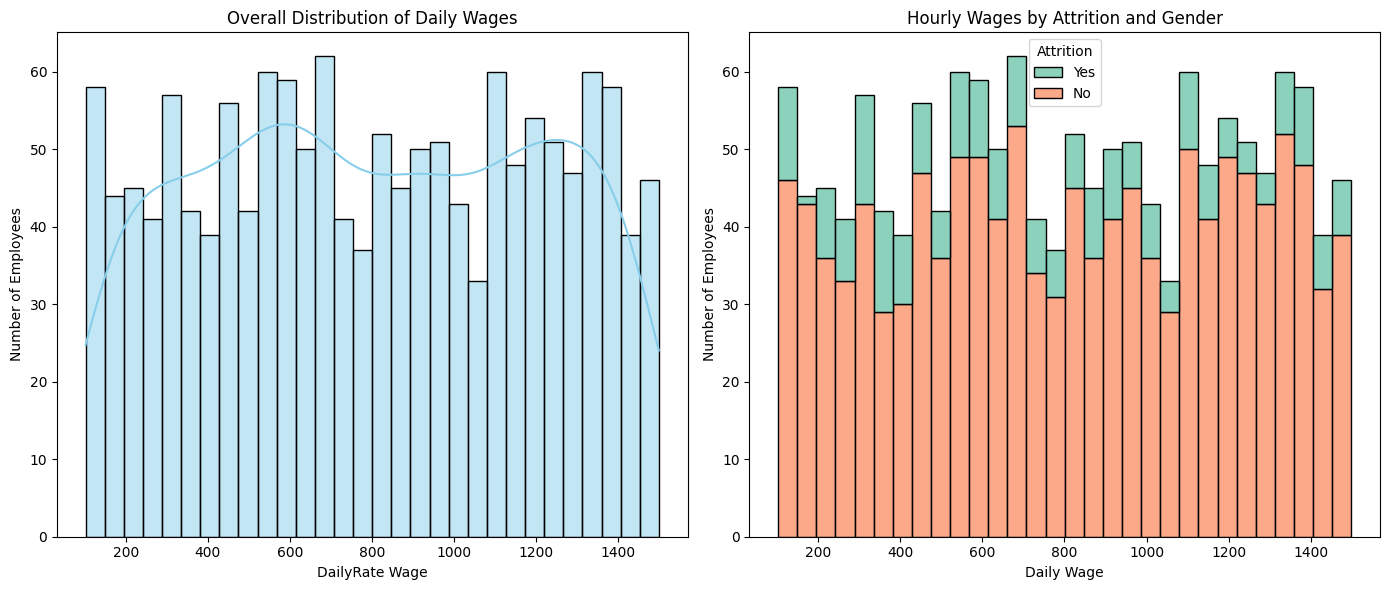

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['DailyRate'], kde=True, bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Overall Distribution of Daily Wages')
axes[0].set_xlabel('DailyRate Wage')
axes[0].set_ylabel('Number of Employees')

sns.histplot(
    data=df,
    x='DailyRate',
    hue='Attrition',
    multiple='stack',
    bins=30,
    ax=axes[1],
    palette='Set2'
)
axes[1].set_title('Hourly Wages by Attrition and Gender')
axes[1].set_xlabel('Daily Wage')
axes[1].set_ylabel('Number of Employees')

plt.tight_layout()
plt.show()

### Important Factors Taken into Consideration while keeping a job

#### Business Travel

#### Distance From Home